<a href="https://colab.research.google.com/github/chrisrichardson/fenics-tutorial/blob/main/Basic_FEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Finite Element in 1D

### Poisson equation in "strong form"

$${d^2 u\over dx^2} = \rho$$

In Finite Element, we construct integrals on each element. Let us multiply through by an arbitrary function $v(x)$ and integrate LHS by parts:

$$ \int {d^2 u\over dx^2}v dx = -\int {du\over dx}{dv\over dx} dx = \int \rho v dx$$

We let $u$ be discretized by piecewise linear functions.
In this case, we will use linear basis functions $\phi_0 = {x-x_0\over x_1 - x_0}$ and $\phi_1 = {x_1 - x\over x_1 - x_0}$ on the element which lies between $x_0$ and $x_1$. On an element, we can then approximate that:

$$u(x) = u_0 \phi_0(x) + u_1 \phi_1(x)$$
where $u_0$ and $u_1$ are coefficients, effectively the value of $u$ at each end of the interval.
Therefore also: $${du\over dx} = u_0 {d\phi_0\over dx} + u_1 {d\phi_1\over dx}$$

$v(x)$ can be anything! But let us suppose it is $\phi_0(x)$. Then we get:

$$ - u_0 \int {d\phi_0\over dx} {d\phi_0\over dx} dx - u_1 \int {d\phi_1\over dx} {d\phi_0\over dx} dx = \int \rho \phi_0 dx $$

This is an equation for the unknowns $u_0$ and $u_1$. And we can obtain another similar one by using $v(x) = \phi_1(x)$.

Repeating this process for every element results in a set of $n$ equations for $n$ unknowns, which can be written as a matrix algebra problem: $$A.u = b$$


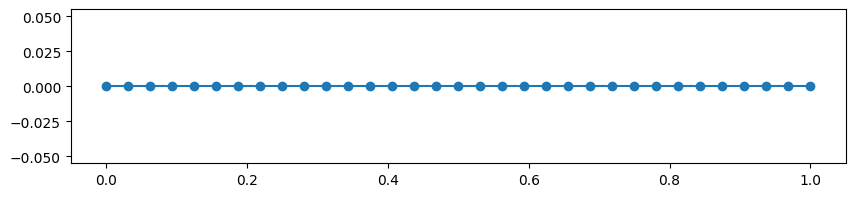

In [96]:
# In 1D, a mesh is just a set of "intervals" along a line
# We will create this "mesh" as a numpy array
import numpy as np
import matplotlib.pyplot as plt

npts = 33
x = np.linspace(0.0, 1.0, npts)
plt.figure(figsize=(10, 2))
plt.plot(x, np.zeros_like(x), marker='o')
plt.show()

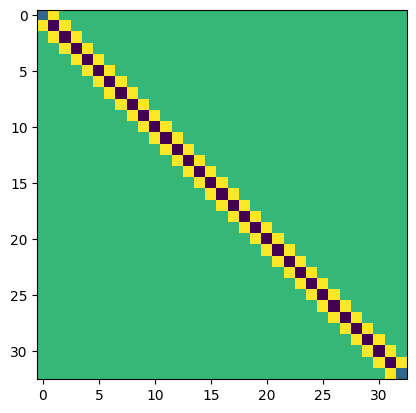

In [104]:
# The number of elements is one less than the number of points
nelem = npts - 1

# Solve the equation d^2u/dx^2 = 1

# Assemble a matrix for LHS
A = np.zeros((npts, npts))

for i in range(nelem):
  dx = x[i + 1] - x[i]
  A[i, i] += -1/dx # -∫(dϕ0/dx)^2 dx
  A[i, i + 1] += 1/dx # -∫(dϕ0/dx)*(dϕ1/dx) dx
  A[i + 1, i] += 1/dx # -∫(dϕ1/dx)*(dϕ0/dx) dx
  A[i + 1, i + 1] += -1/dx # -∫(dϕ1/dx)^2 dx

# Visualise the matrix. Note that most entries are still zero.
plt.imshow(A)

# Assemble a vector for RHS (rho = 1.0)
b = np.zeros(npts)
rho = 1.0
for i in range(nelem):
  dx = x[i + 1] - x[i]
  b[i] += rho * 0.5 * dx # ∫ρ ϕ0 dx
  b[i + 1] += rho * 0.5 * dx # ∫ρ ϕ1 dx


In [105]:
u = np.linalg.solve(A, b)
plt.plot(x, u, marker='o')
plt.show()

LinAlgError: Singular matrix

# Why the error?

Lack of boundary conditions... when we specified the equations, we didn't give enough information. By default, a FEM discretization will give "natural" boundary conditions on any external boundary (the ends), i.e. zero gradient. The problem is just ill-posed in this case (how can we have a range with an increasing gradient, but zero gradient at both ends). We can fix it by forcing one end to have a particular value (Dirichlet BC). The correct answer should then be: $$ u = {1\over2}x^2 - x$$

In [106]:
# Make the first entry in the solution be zero.
A[0, :] = 0.0
A[0, 0] = 1.0
b[0] = 0.0

In [107]:
# Solve the linear system
u = np.linalg.solve(A, b)

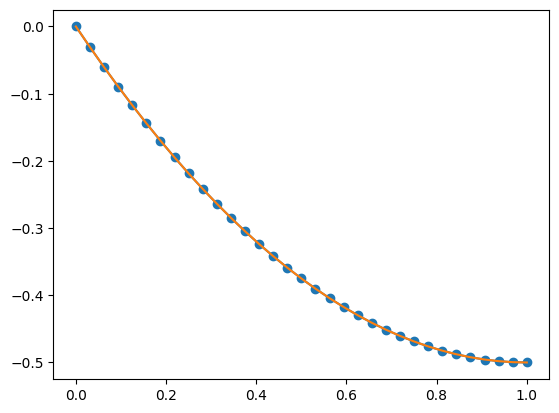

In [108]:
plt.plot(x, u, marker='o')
plt.plot(x, x**2/2 - x) # check against known answer
plt.show()

## Task: set a Dirichlet boundary condition for the other boundary (x=1)

In [109]:
# Hint - clear the last row of A; set the last diagonal entry of A to 1.0, and
# set the last entry of b to zero, then re-solve and replot.

## Task: change the resolution of the mesh

In [110]:
# Hint - go back and edit "npts" and restart the notebook.

## Task: change mesh spacing

In [111]:
# e.g. use `linspace(0, 1.0, npts) ** 2` or `np.sqrt(linspace(0.0, 1.0, npts))` and restart